In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import logging

# RAW DATA

In [6]:
df = pd.read_csv("D:\\new\\DATASET 1\\df_csv.csv")

In [7]:
df.head(10)

,b,fc,d,fy,r,M
0,127.0,30.55,216.0,421.0,3.01,46.364
1,127.0,38.97,216.0,421.0,3.01,47.417
2,127.0,44.62,216.0,421.0,3.01,48.034
3,127.0,82.34,198.0,421.0,5.54,85.983
4,127.0,85.79,198.0,421.0,5.54,86.295
5,127.0,89.31,198.0,421.0,5.54,86.600
6,127.0,88.21,198.0,421.0,5.54,86.507
7,127.0,86.97,198.0,421.0,5.54,86.399
8,127.0,82.97,198.0,421.0,5.54,86.042
9,150.0,51.10,230.0,410.0,2.32,70.290


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       267 non-null    float64
 1   fc      267 non-null    float64
 2   d       267 non-null    float64
 3   fy      267 non-null    float64
 4   r       267 non-null    float64
 5   M       267 non-null    float64
dtypes: float64(6)
memory usage: 12.6 KB


# Exploratory Data Analysis(EDA)

In [13]:
# Check the missing Values
df.isnull().sum()

b     0
fc    0
d     0
fy    0
r     0
M     0
dtype: int64

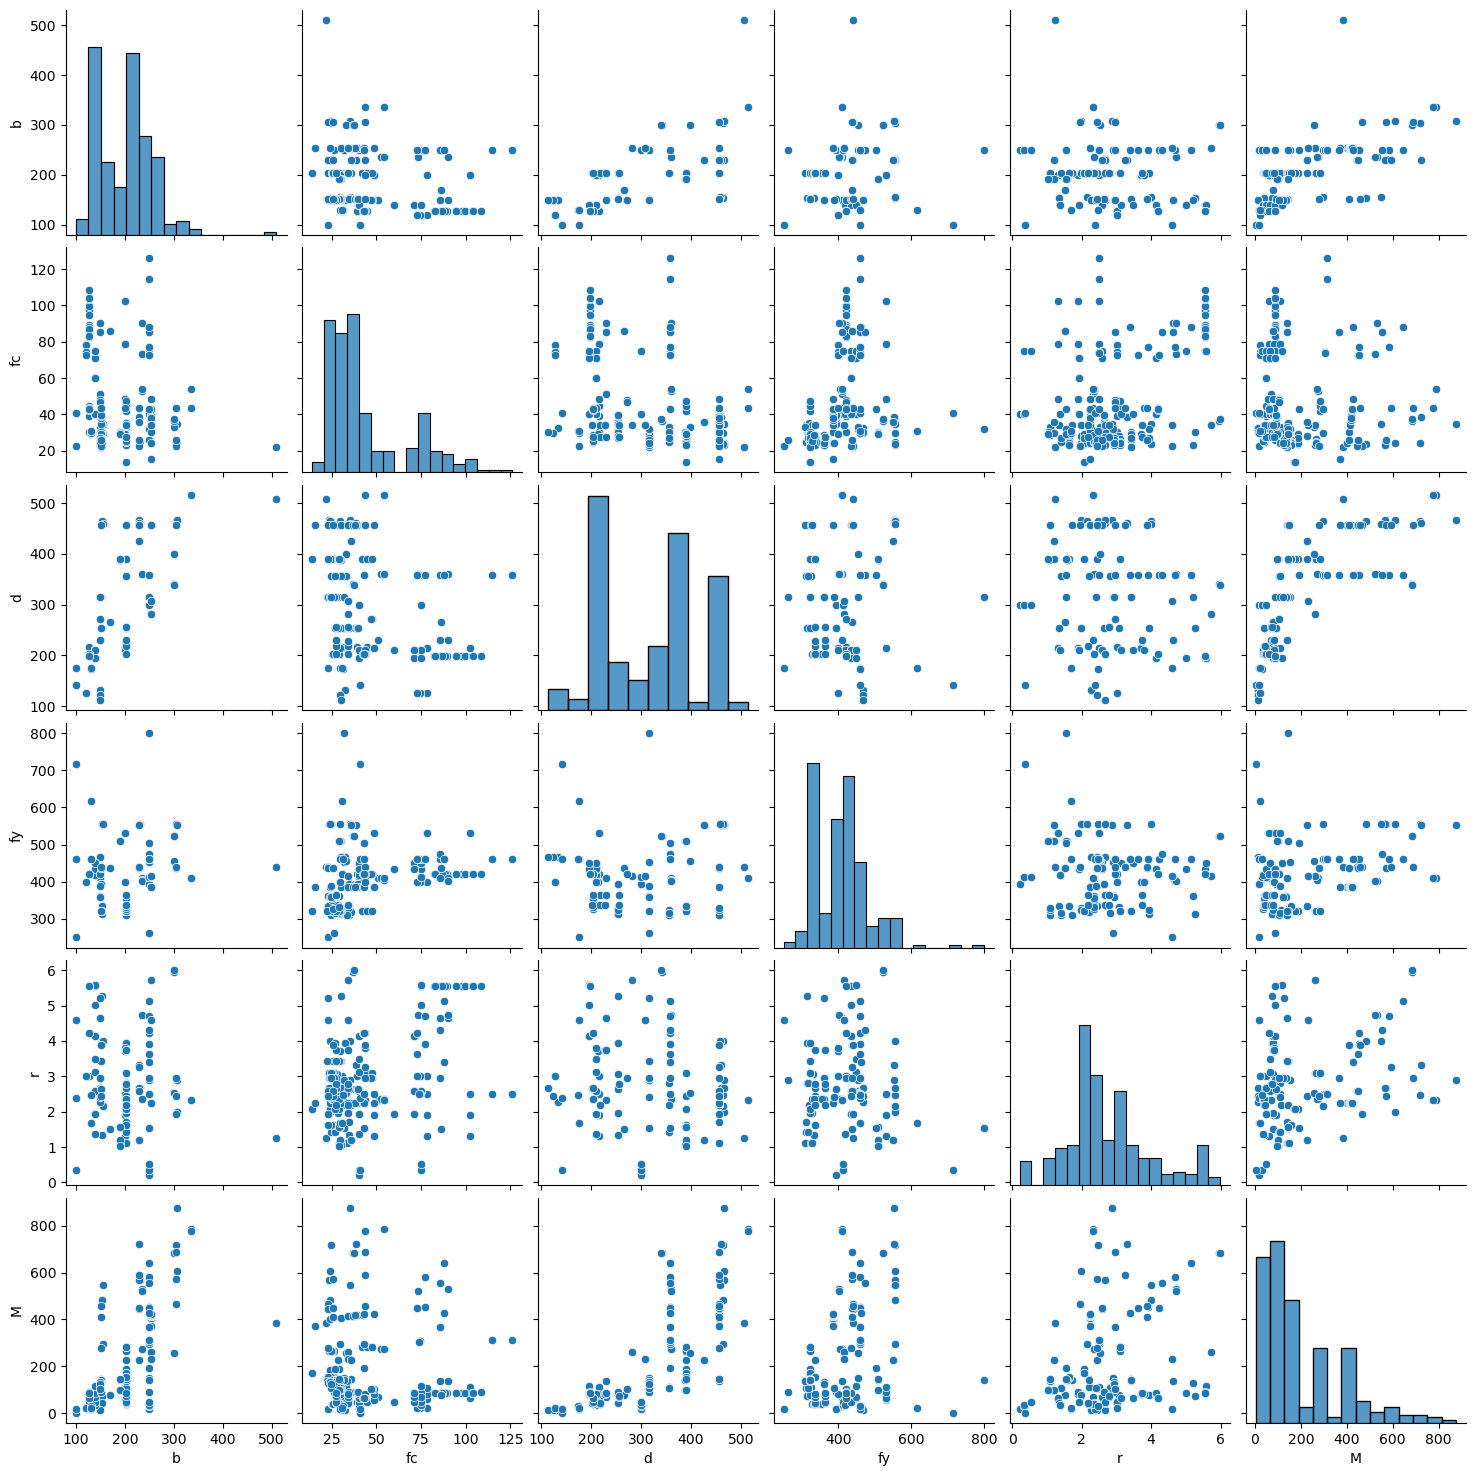

In [14]:
 # Visualize the data using seaborn Pairplots
sns.pairplot(df)

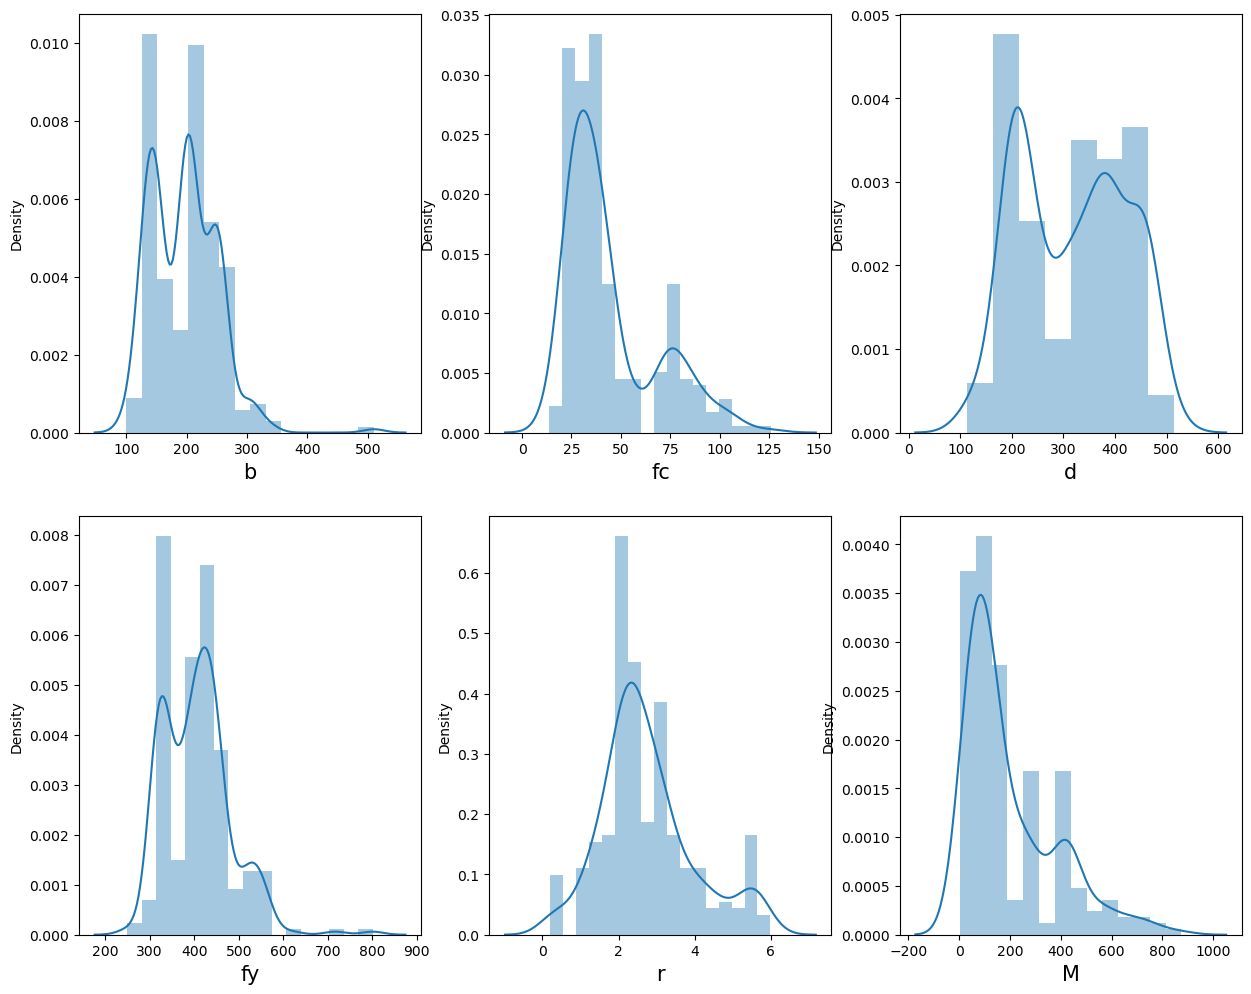

In [15]:
# Data Distribution plot
plt.figure(figsize=(15,25), facecolor = 'white')
plotnumber = 1

for column in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# Data Transformation

In [16]:
# convert into DataFrame
data = pd.DataFrame(df)
data

,b,fc,d,fy,r,M
0,127.0,30.55,216.00,421.0,3.01,46.364
1,127.0,38.97,216.00,421.0,3.01,47.417
2,127.0,44.62,216.00,421.0,3.01,48.034
3,127.0,82.34,198.00,421.0,5.54,85.983
4,127.0,85.79,198.00,421.0,5.54,86.295
...,...,...,...,...,...,...
262,127.0,99.70,198.12,421.0,5.54,87.577
263,127.0,103.42,198.12,421.0,5.54,87.863
264,127.0,94.73,198.12,421.0,5.54,87.181
265,127.0,108.66,198.12,421.0,5.54,88.250


In [17]:
X = df.drop(['M'], axis = 1)
y = df['M']
X.shape
y.shape

(267,)

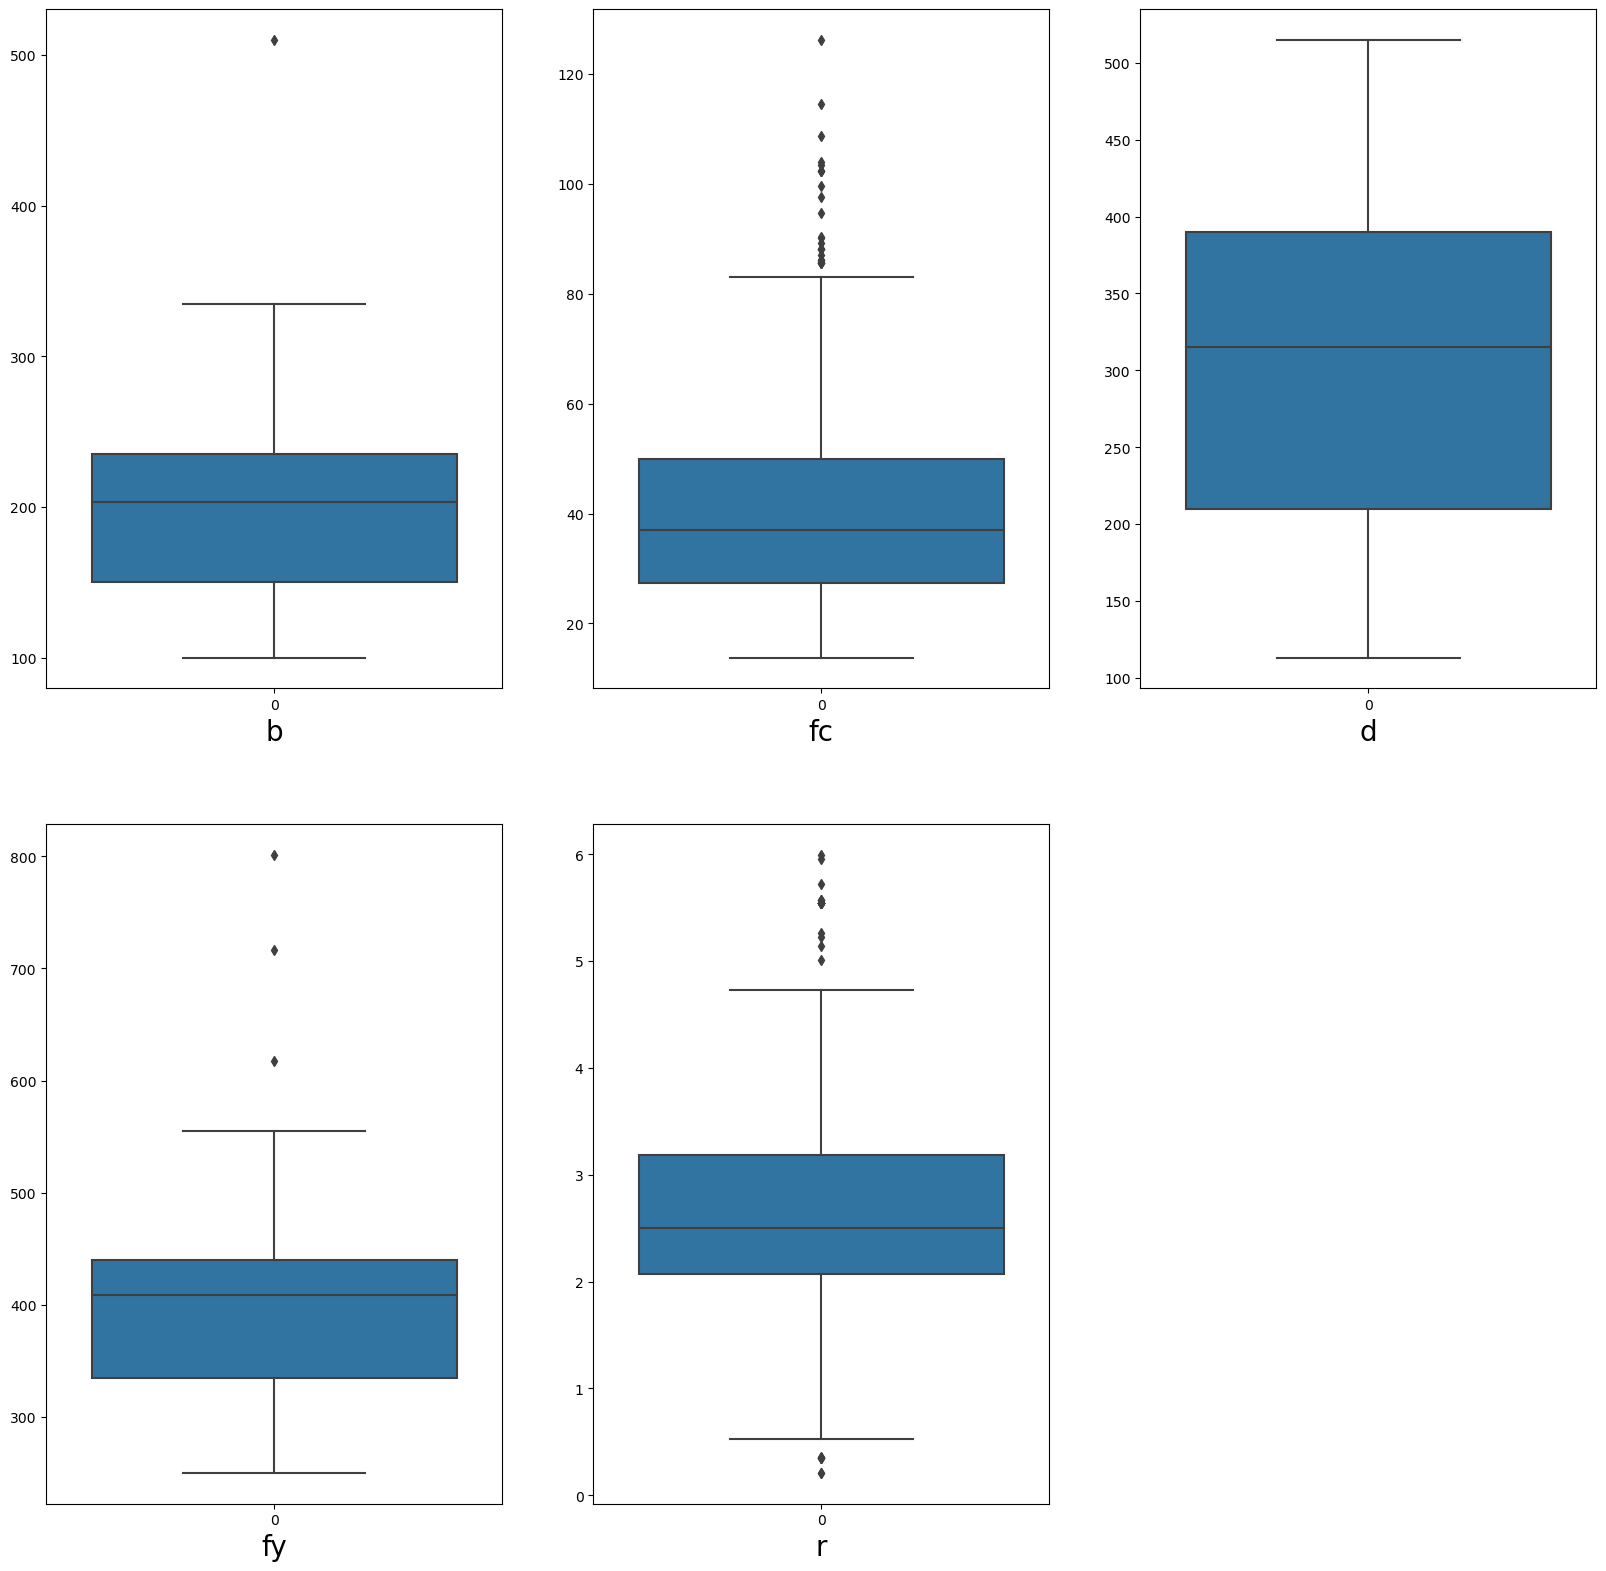

In [18]:
# check for outliers with Box plot

plt.figure(figsize=(20,30),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(3,3,plotnumber)
    sns.boxplot((X[column]))
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [19]:
df.describe()

,b,fc,d,fy,r,M
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,195.278202,44.154772,316.707566,406.243845,2.748127,198.253386
std,53.523257,22.868573,102.449107,75.059687,1.214761,179.051210
min,100.000000,13.800000,113.000000,250.000000,0.210000,2.648000
25%,150.000000,27.440000,210.000000,335.000000,2.070000,67.493500
50%,203.000000,37.100000,315.000000,409.000000,2.500000,134.696000
75%,235.000000,49.855000,390.000000,439.750000,3.185000,279.629000
max,510.000000,126.200000,515.000000,801.010000,5.990000,875.451000


# Distribution plot of target variable and features

Text(0, 0.5, 'Flexure (mm)')

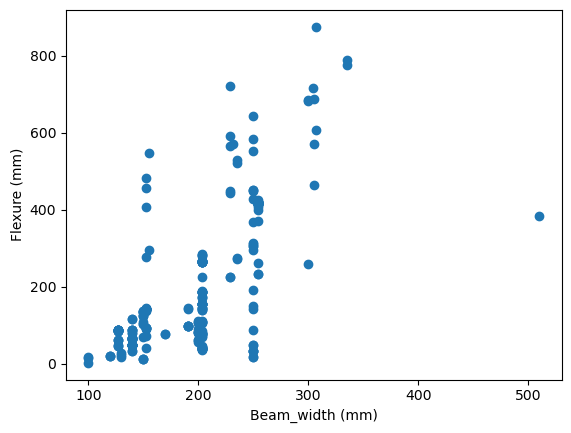

In [20]:
plt.scatter(df['b'],df['M'])
plt.xlabel('Beam_width (mm)')
plt.ylabel('Flexure (mm)')

Text(0, 0.5, 'Flexure (KN.m)')

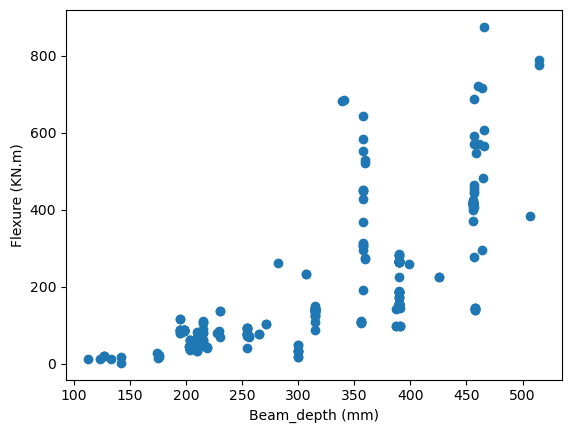

In [21]:
plt.scatter(df['d'],df['M'])
plt.xlabel('Beam_depth (mm)')
plt.ylabel('Flexure (KN.m)')

Text(0, 0.5, 'Flexure (KN.m)')

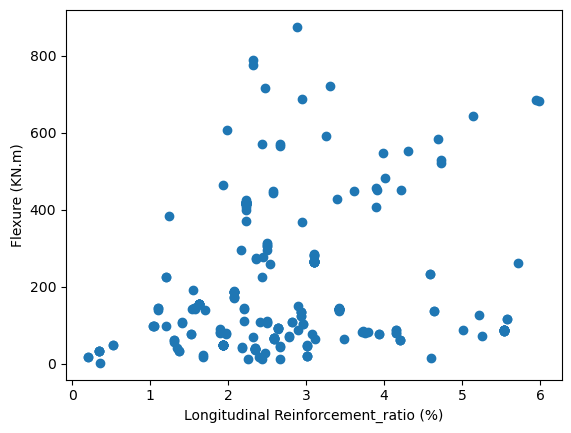

In [23]:
plt.scatter(df['r'],df['M'])
plt.xlabel('Longitudinal Reinforcement_ratio (%)')
plt.ylabel('Flexure (KN.m)')

Text(0, 0.5, 'Flexure (KN.m)')

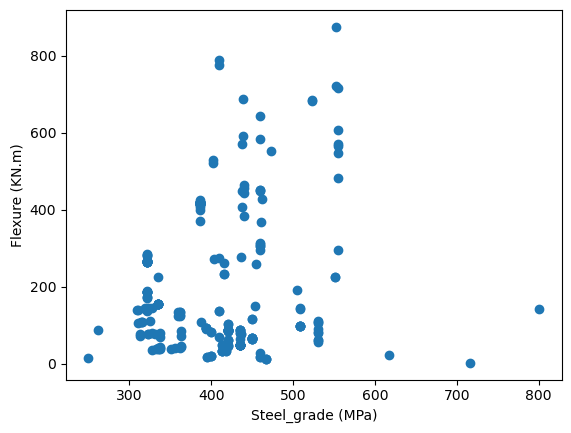

In [24]:
plt.scatter(df['fy'],df['M'])
plt.xlabel('Steel_grade (MPa)')
plt.ylabel('Flexure (KN.m)')

Text(0, 0.5, 'Flexure (KN.m)')

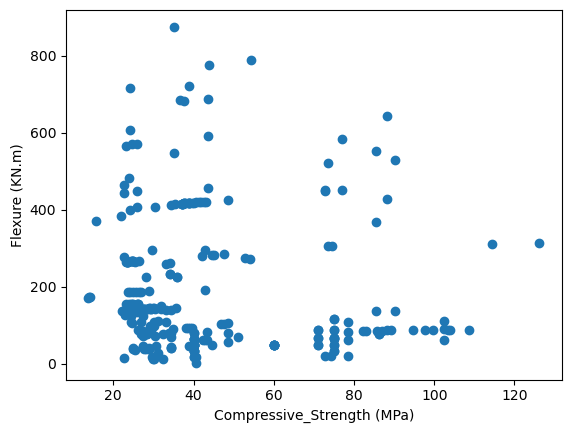

In [25]:
plt.scatter(df['fc'],df['M'])
plt.xlabel('Compressive_Strength (MPa)')
plt.ylabel('Flexure (KN.m)')

# Scalarization

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform (X)
X_norm

array([[-1.27806916, -0.59602845, -0.98484692,  0.19696147,  0.21598038],
       [-1.27806916, -0.22714614, -0.98484692,  0.19696147,  0.21598038],
       [-1.27806916,  0.02038178, -0.98484692,  0.19696147,  0.21598038],
       ...,
       [-1.27806916,  2.21571344, -1.15970035,  0.19696147,  2.30260664],
       [-1.27806916,  2.82599023, -1.15970035,  0.19696147,  2.30260664],
       [-1.27806916,  2.62358687, -1.15970035,  0.19696147,  2.30260664]])

# Splitting the Raw Data - Hold-out validation

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 64)

In [28]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_train

array([[-1.01665033, -0.22460362, -1.15784232,  0.3971584 ,  1.17441177],
       [ 0.15326103, -0.87530093, -1.07753169, -0.7752083 , -0.35078799],
       [ 0.15326103, -0.48222489, -0.57999758, -1.09178913, -0.67277461],
       ...,
       [ 0.15326103, -0.51480262,  1.41013889, -1.35135474, -1.40995449],
       [ 1.09363282, -0.27175559,  1.39838611, -0.285909  , -0.45246797],
       [-1.01665033,  0.63270511, -1.01093264,  0.3971584 , -0.70666793]])

In [29]:
X_normal = (X - X.min()) / (X.max() - X.min())
X_normal

,b,fc,d,fy,r
0,0.065854,0.149021,0.256219,0.310339,0.484429
1,0.065854,0.223932,0.256219,0.310339,0.484429
2,0.065854,0.274199,0.256219,0.310339,0.484429
3,0.065854,0.609786,0.211443,0.310339,0.922145
4,0.065854,0.640480,0.211443,0.310339,0.922145
...,...,...,...,...,...
262,0.065854,0.764235,0.211741,0.310339,0.922145
263,0.065854,0.797331,0.211741,0.310339,0.922145
264,0.065854,0.720018,0.211741,0.310339,0.922145
265,0.065854,0.843950,0.211741,0.310339,0.922145


# Model building

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

XGB1 = GradientBoostingRegressor(random_state=0)
XGB1.fit(X_train, y_train)


GradientBoostingRegressor(random_state=0)

In [31]:
XGB1.feature_importances_

array([0.13983873, 0.00571856, 0.64551824, 0.01614204, 0.19278242])

<Axes: title={'center': ' XG Boost Regressor Feature Importance'}, ylabel=' Features'>

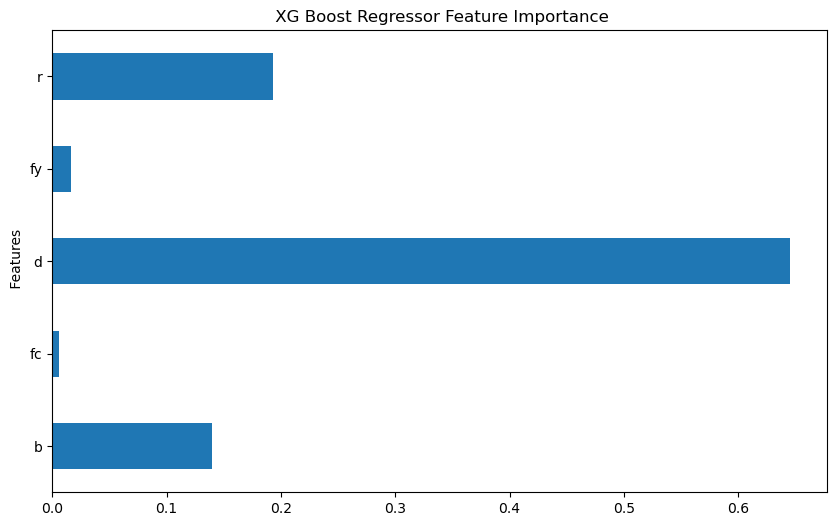

In [32]:
importances = pd.Series(XGB1.feature_importances_ , index=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel(" Features")
plt.title(" XG Boost Regressor Feature Importance")
importances.plot(kind = 'barh', figsize=(10,6))

# Model Evaluation

In [33]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,XGB1.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,XGB1.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,XGB1.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,XGB1.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,XGB1.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,XGB1.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,XGB1.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,XGB1.predict(X_train)))

The RMSE  on the testing dataset is:  33.5190870444979
The RMSE  on the training dataset is:  7.380639074177401
The MSE  on the testing dataset is:  1123.529196296627
The MSE  on the training dataset is:  54.47383314327424
The MAE  on the testing dataset is:  15.996816275087852
The MAE  on the training daset is:  4.710906745868593
The r2_score on the testing dataset is:  0.9709249048439857
The r2_score on the training dataset is:  0.9981944269157267


# Optimization

In [34]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 200, 300],
           'colsample_bytree': [0.3, 0.7]}

XGB = xgb.XGBRegressor(seed = 20)

XGB = GridSearchCV(estimator=XGB, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
XGB.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 9, 12],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [35]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,XGB.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,XGB.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,XGB.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,XGB.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,XGB.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,XGB.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,XGB.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,XGB.predict(X_train)))

The RMSE  on the testing dataset is:  23.392906918817687
The RMSE  on the training dataset is:  3.09459168853255
The MSE  on the testing dataset is:  547.2280941124684
The MSE  on the training dataset is:  9.576497718734739
The MAE  on the testing dataset is:  11.227209140918873
The MAE  on the training daset is:  2.094628980287363
The r2_score on the testing dataset is:  0.9858386333343102
The r2_score on the training dataset is:  0.9996825803229769


In [36]:
XGB_TEST = XGB.predict(X_test)

In [37]:
XGB_TRAIN = XGB.predict(X_train)

# Visualize Actual Vs Predicted

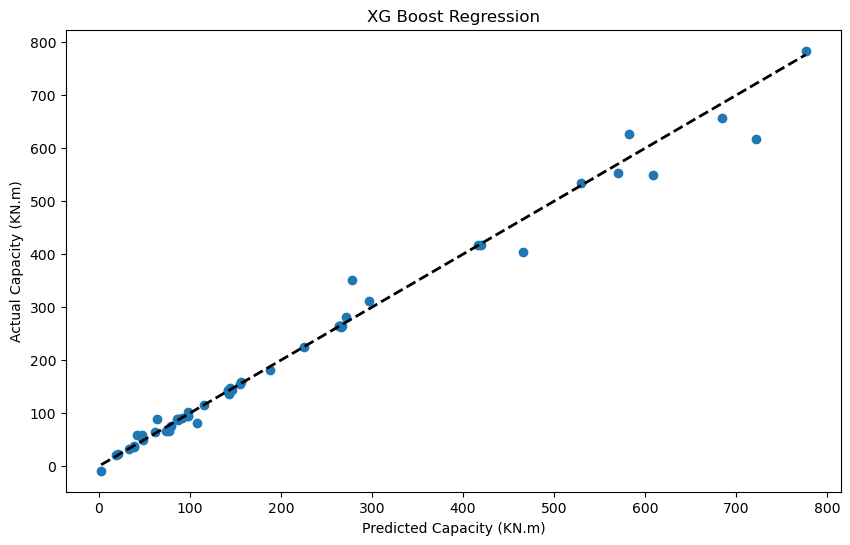

In [38]:
plt.figure(figsize=(10,6))
plt.title('XG Boost Regression')
plt.xlabel("Predicted Capacity (KN.m)")
plt.ylabel("Actual Capacity (KN.m)")
plt.scatter(y_test,XGB_TEST)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Prediction with new data

In [43]:
X1 = np.array(X)

In [44]:
X1[0].reshape(1,-1)

array([[127.  ,  30.55, 216.  , 421.  ,   3.01]])

In [45]:
XGB.predict(scaler.transform(X1[0].reshape(1,-1)))

array([47.826786], dtype=float32)

# Pickling The Model For Deployment

In [46]:
import pickle
with open('XGB_pkl', 'wb')as f:
    pickle.dump(XGB,f)


In [48]:
pickled_model = pickle.load(open('XGB_pkl', 'rb'))


array([47.826786], dtype=float32)

In [50]:
pickled_model.predict(scaler.transform(X1[0].reshape(1,-1)))

array([47.826786], dtype=float32)

In [52]:
Xn = np.array([[230, 416, 3.01, 421, 78]])
pickled_model.predict(scaler.transform(Xn.reshape(1,-1)))

array([265.11053], dtype=float32)